<a href="https://colab.research.google.com/github/Joshuajee/AI-ML-PROJECTS/blob/master/deeplearning/object%20detection/Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Dec  4 19:14:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
!pip install roboflow==1.1.48 --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="TEhsvTpU2TEQFRlBFsml")
project = rf.workspace("jee-cmmsh").project("hand-tool-detection-pbu9x")

loading Roboflow workspace...
loading Roboflow project...


## Download Dataset

In [9]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

version = project.version(5)
dataset_v8 = version.download("yolov8")
dataset_v9 = version.download("yolov9")

/content/datasets



Extracting Dataset Version Zip to Hand-Tool-Detection-5 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 3268.90it/s]


In [10]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

version = project.version(6)
dataset_aug_v8 = version.download("yolov8")
dataset_aug_v9 = version.download("yolov9")

/content/datasets



Extracting Dataset Version Zip to Hand-Tool-Detection-6 in yolov8:: 100%|██████████| 1940/1940 [00:00<00:00, 2827.08it/s]


## YOLOv8

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset_v8.location}/data.yaml epochs=100 imgsz=512 plots=True name="YOLOv8_no_aug"

/content
100% 21.5M/21.5M [00:00<00:00, 179MB/s]
New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Hand-Tool-Detection-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=YOLOv8_no_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

/content


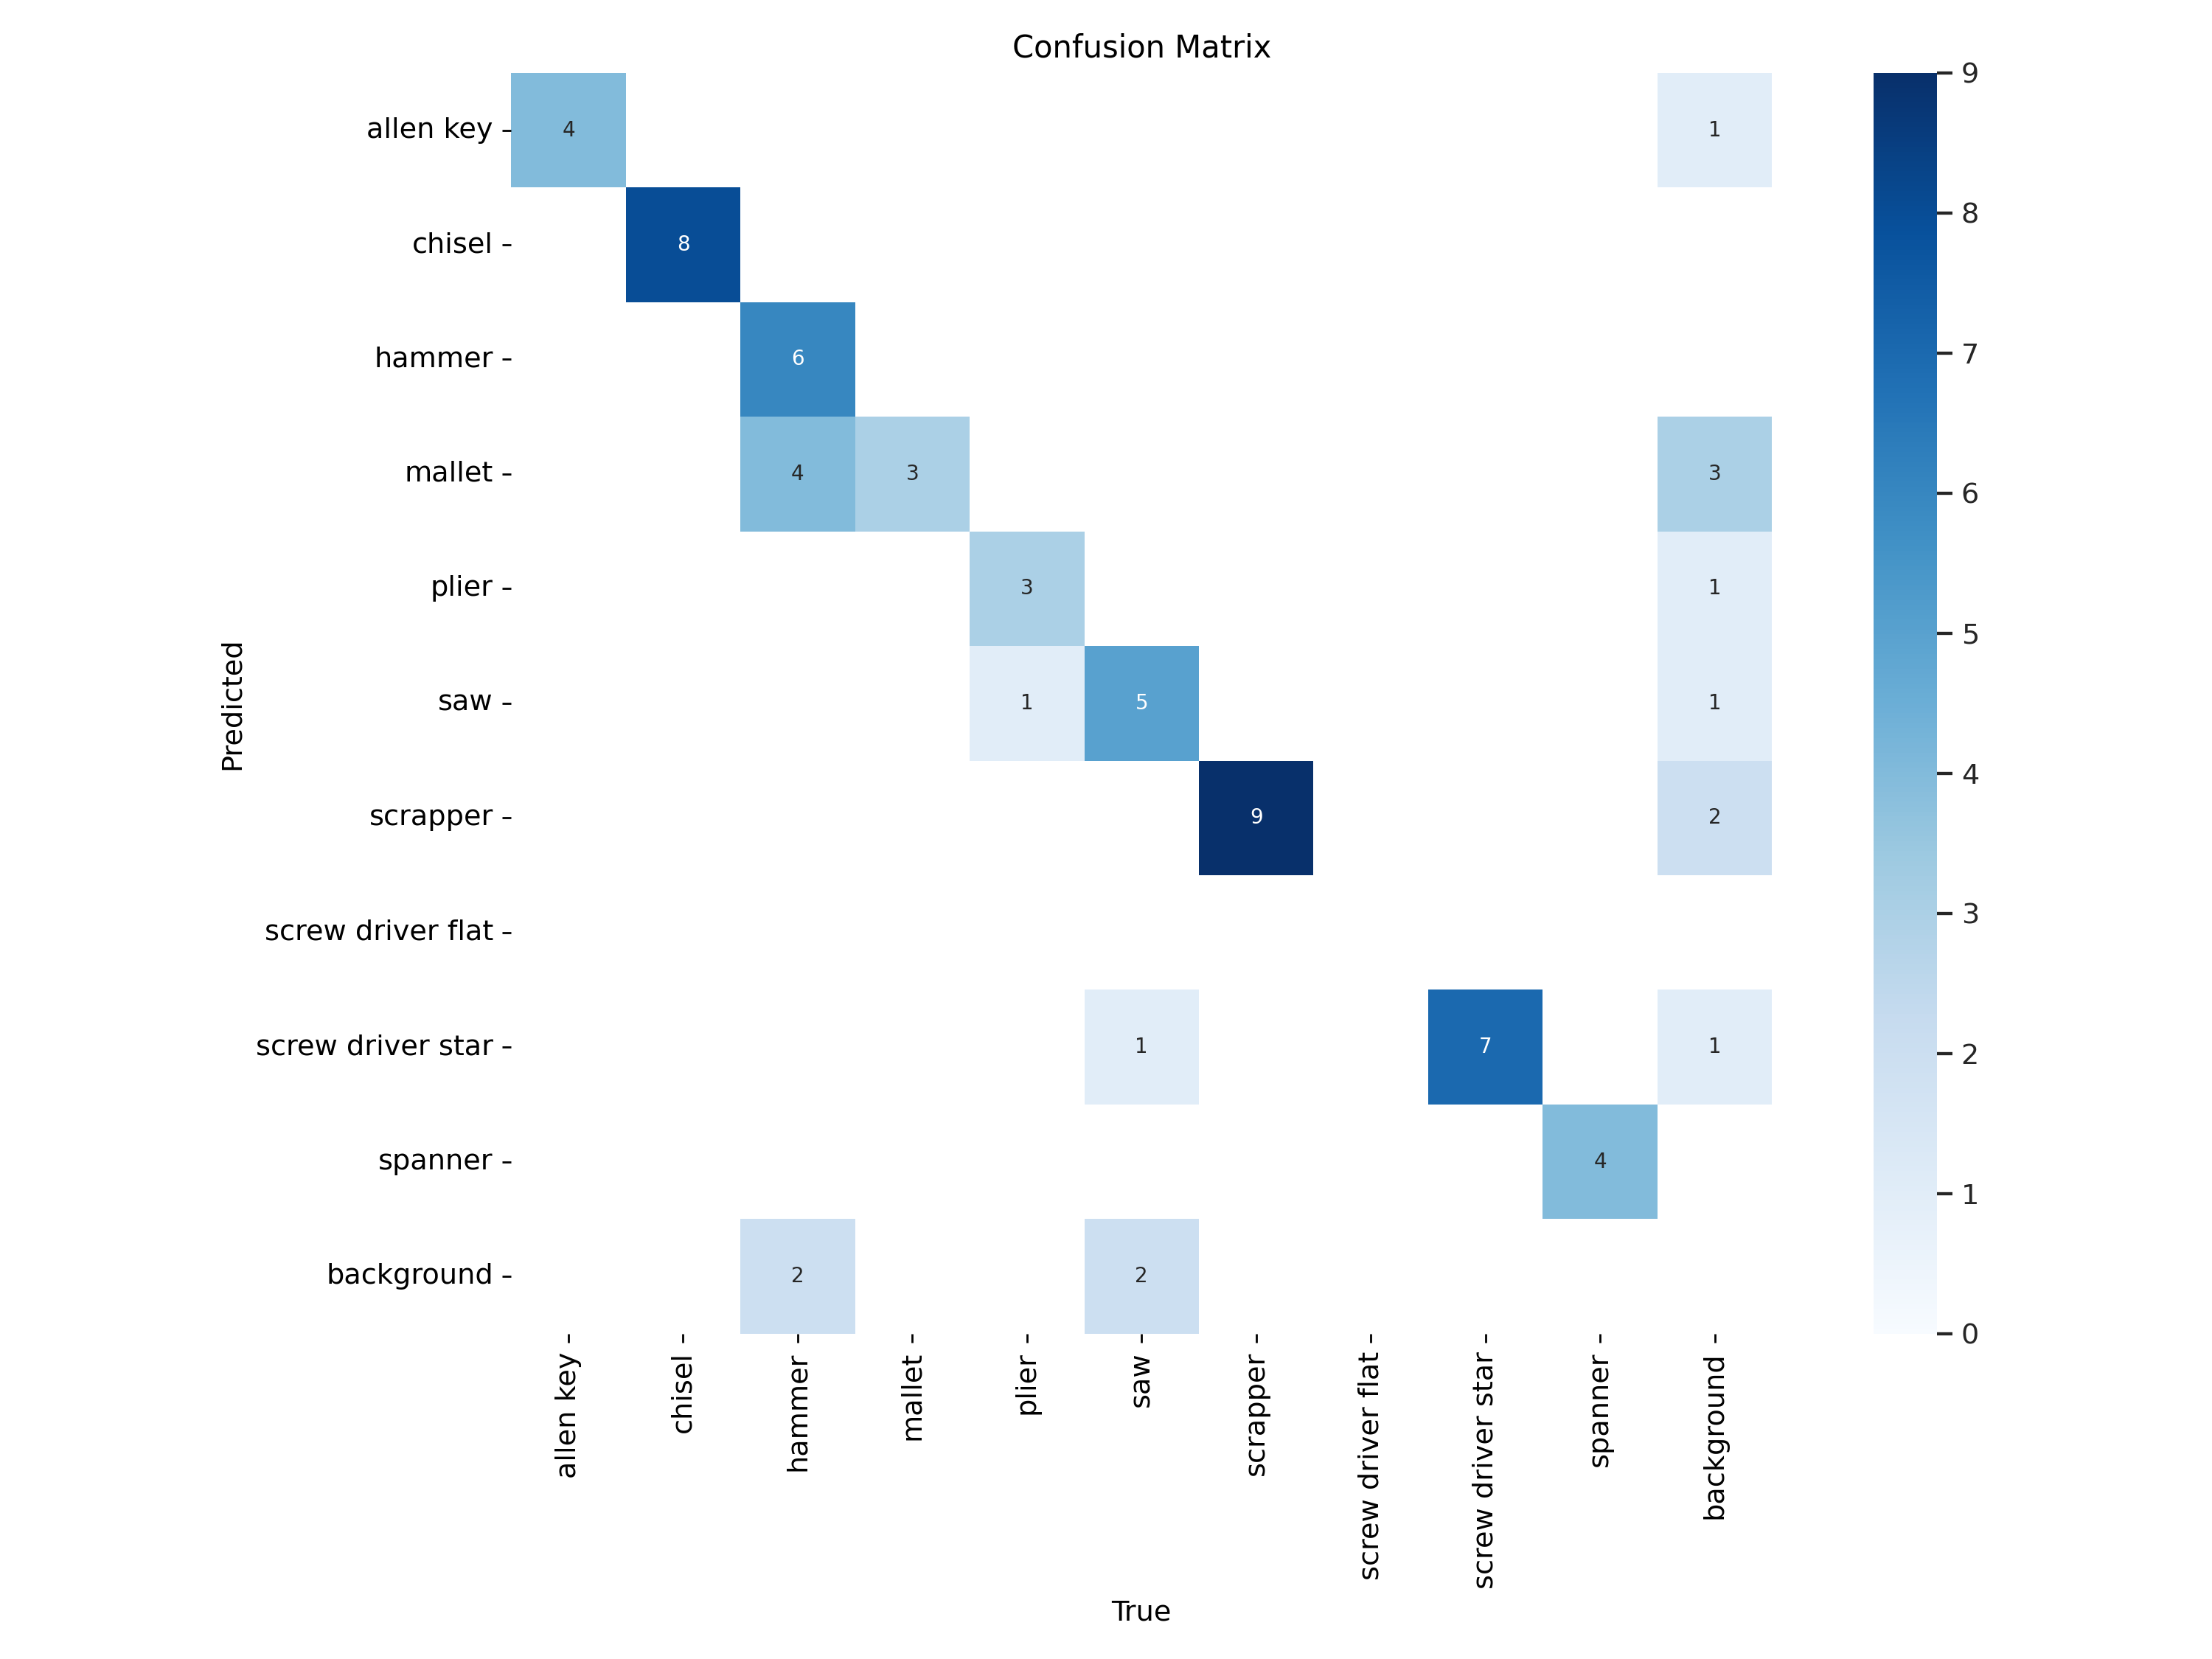

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/YOLOv8_no_aug/confusion_matrix.png', width=1000)

/content


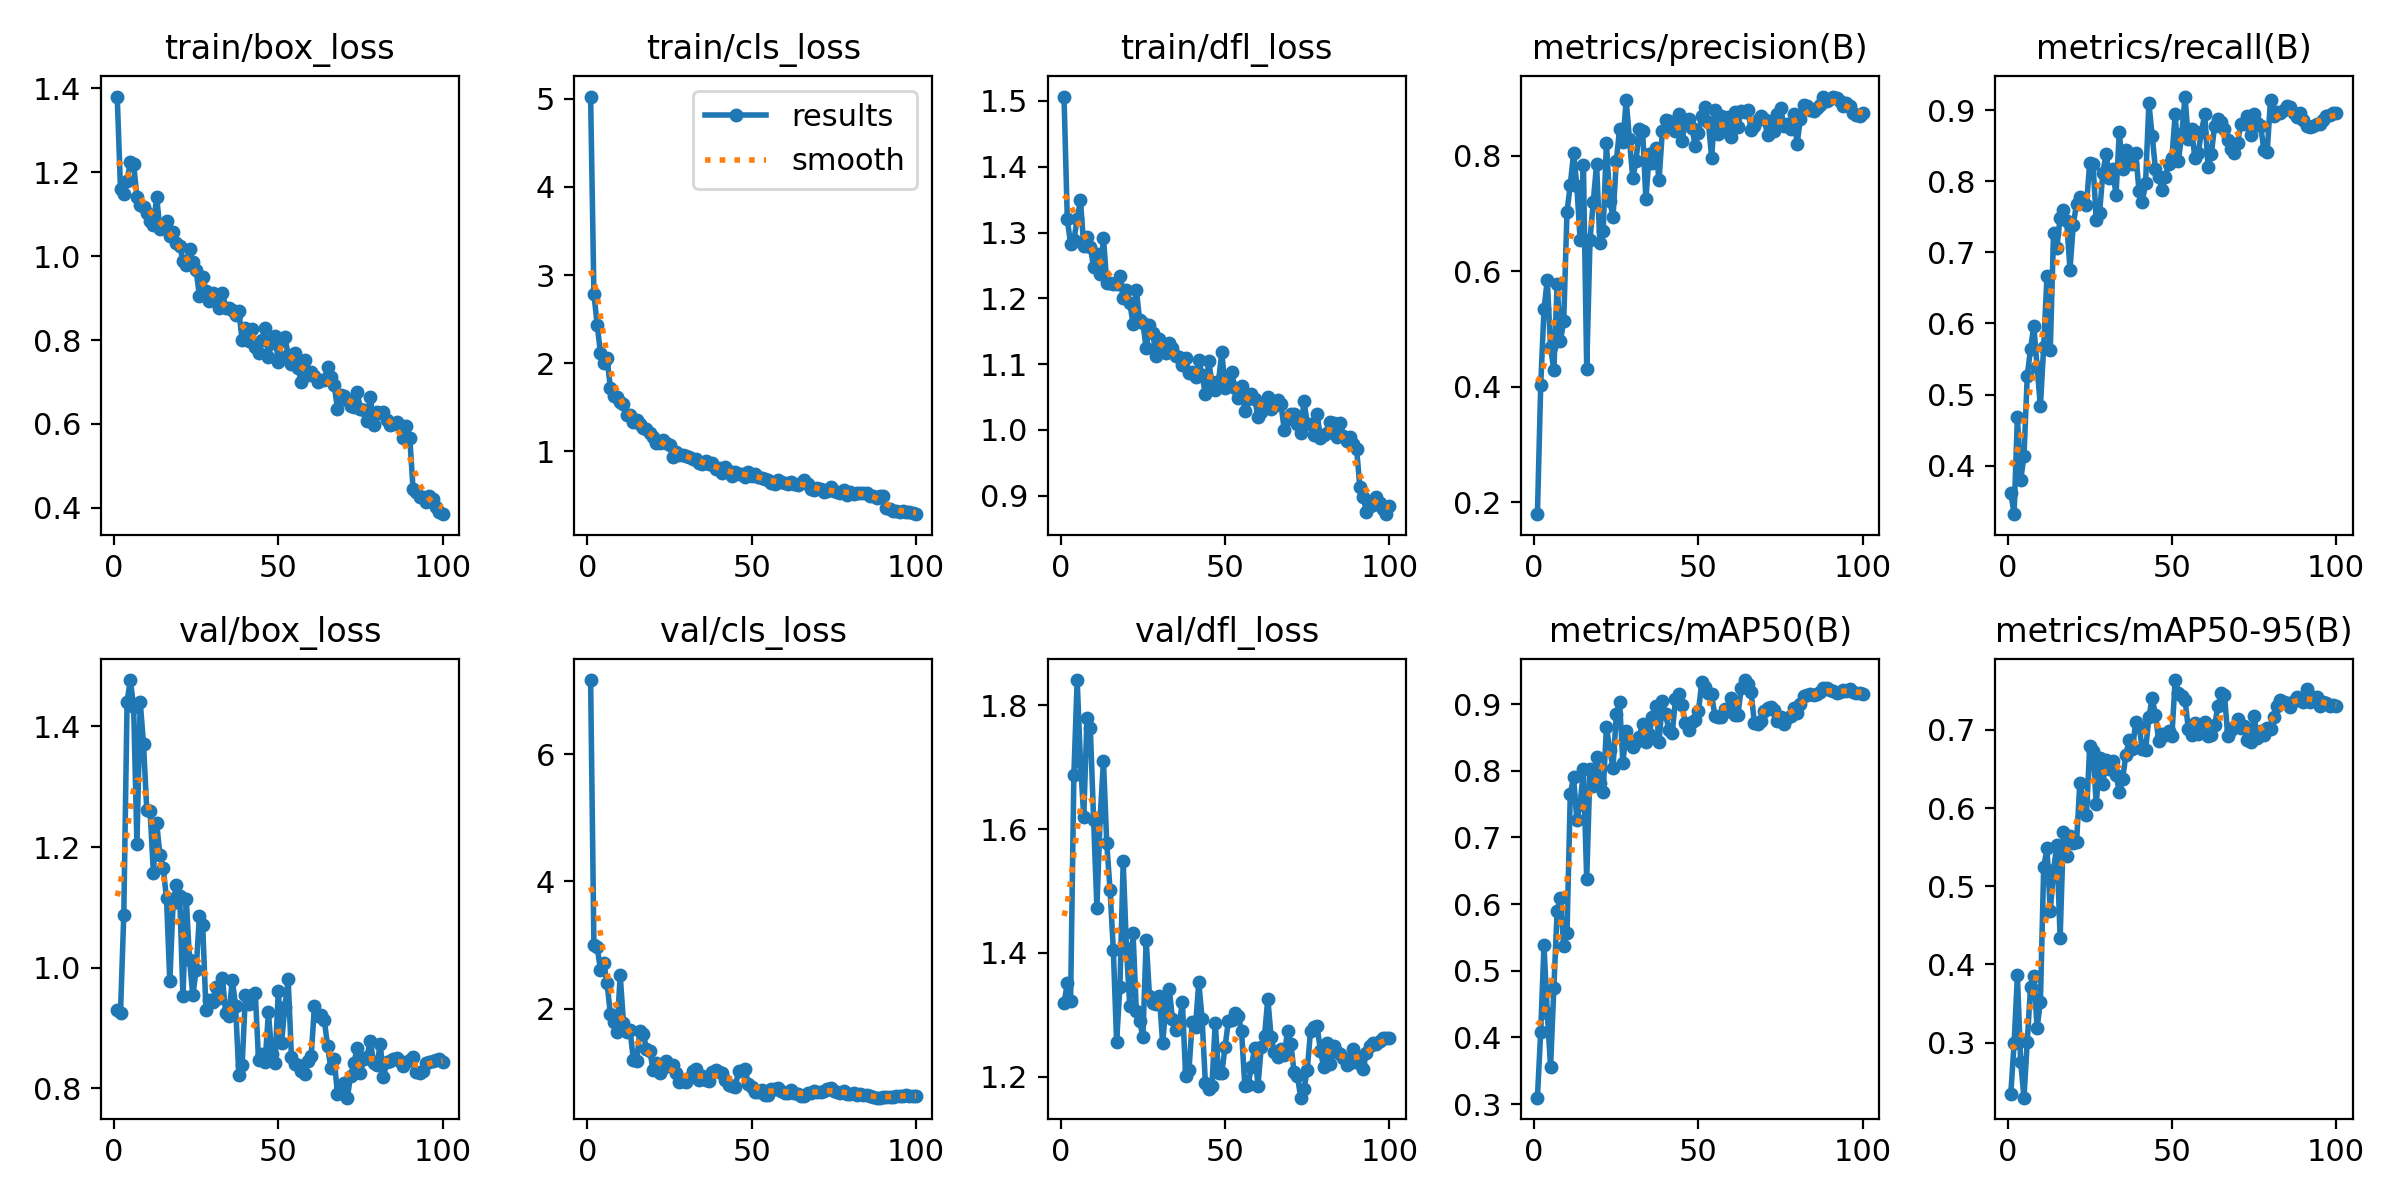

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/YOLOv8_no_aug/results.png', width=1000)

/content


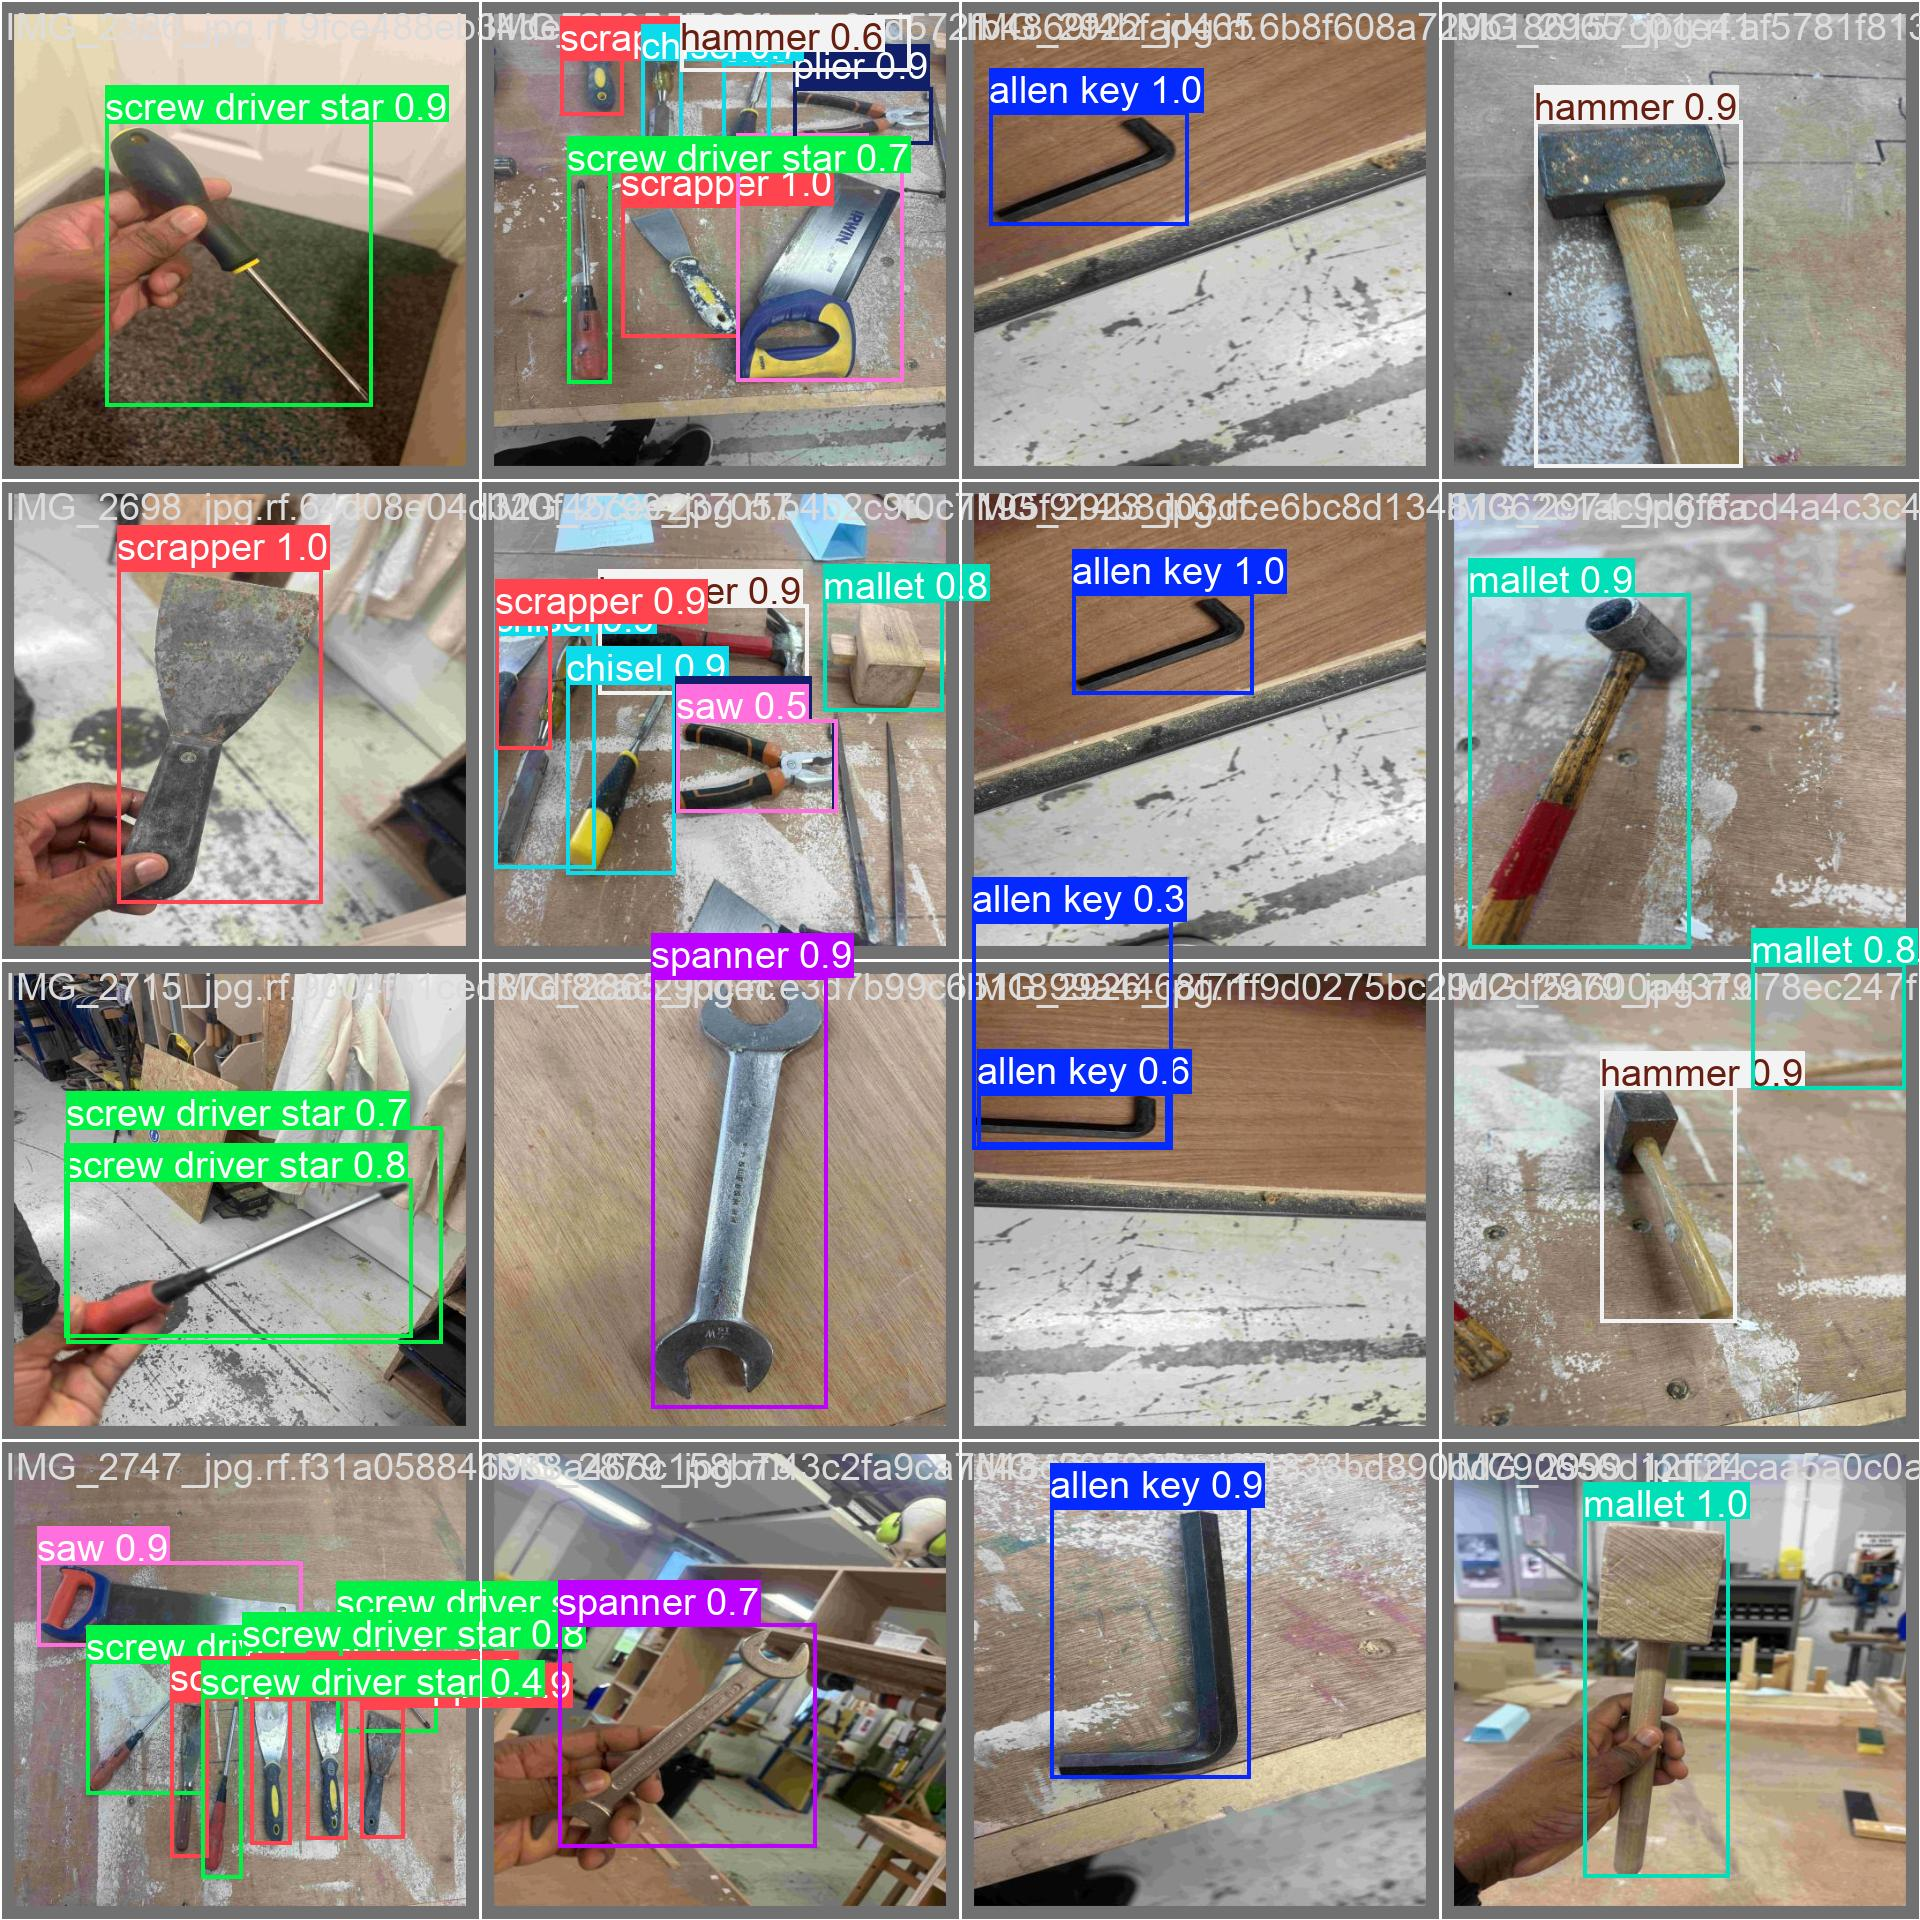

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/YOLOv8_no_aug/val_batch0_pred.jpg', width=1000)

### Validate YOLOv8

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/YOLOv8_no_aug/weights/best.pt data={dataset_v8.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Hand-Tool-Detection-5/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  2.11it/s]
                   all         38         59      0.868      0.894      0.933      0.761
             allen key          4          4      0.989          1      0.995      0.817
                chisel          6          8      0.976          1      0.995      0.732
                hammer         11         12          1      0.471      0.804       0.63
                mallet          3          3      0.319          1      0.913       0.84
                 plier          4          4          1      0.969      0.995      0.864
                   sa

### Inference with YOLOv8

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/YOLOv8_no_aug/weights/best.pt conf=0.25 source={dataset_v8.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs

image 1/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2385_jpg.rf.6ef11b5af92f9946bc3ea109902311b9.jpg: 512x512 1 plier, 11.0ms
image 2/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2386_jpg.rf.1439edfbf4836fd4f95d12dfd5083c83.jpg: 512x512 1 plier, 11.1ms
image 3/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2389_jpg.rf.750a11e918c9dab3e1eb802a79961d48.jpg: 512x512 1 hammer, 11.0ms
image 4/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2393_jpg.rf.5ec86b912a3e7fc706465f54be3f05f8.jpg: 512x512 1 hammer, 1 mallet, 11.0ms
image 5/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2429_jpg.rf.12c7ffca297064877f35cba78eafe650.jpg: 512x512 1 saw, 11.0ms
image 6/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2440_jpg.rf.ab6916c459e15dd13d1372569

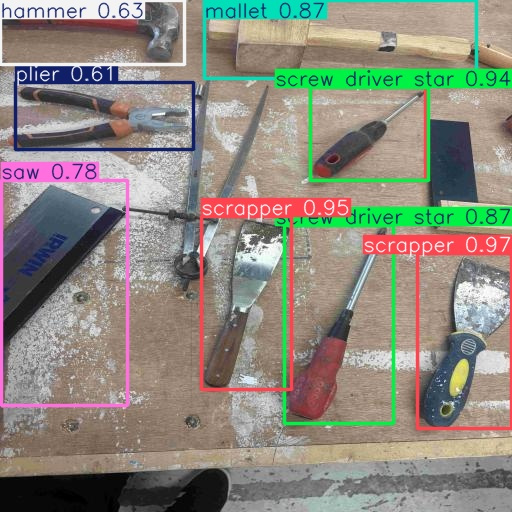

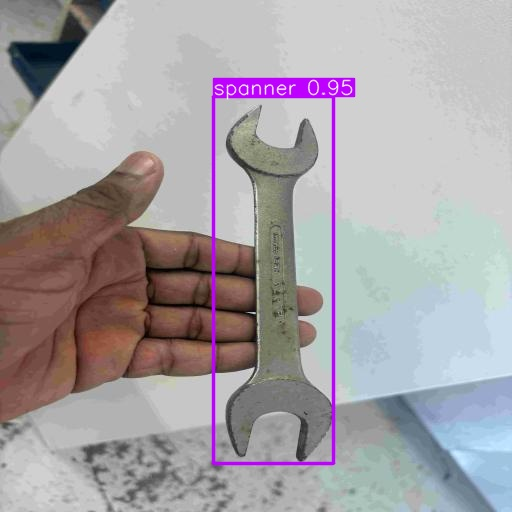

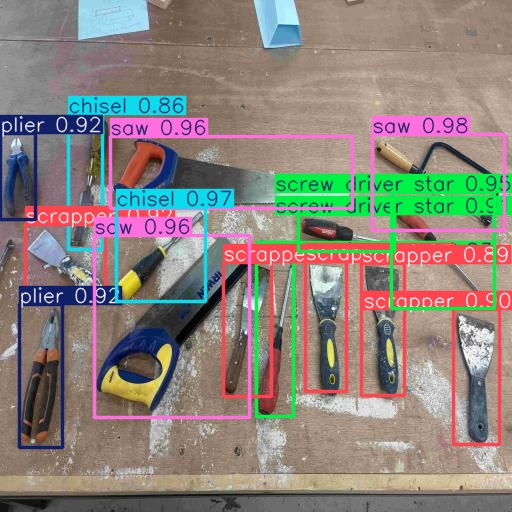

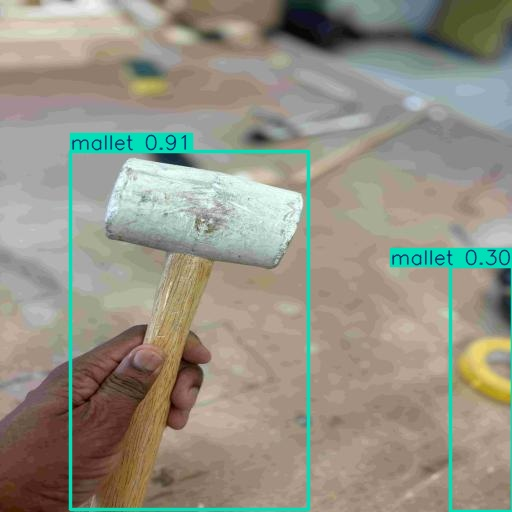

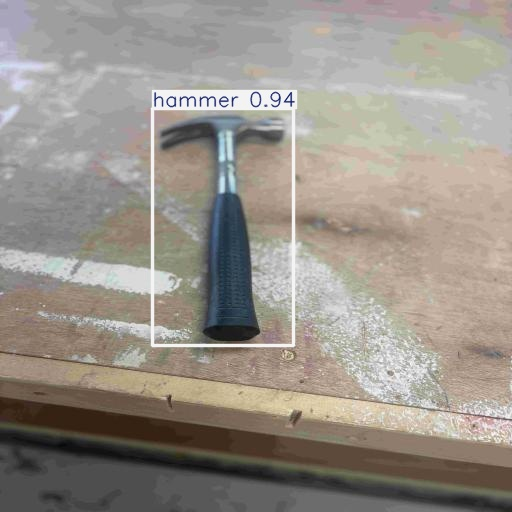

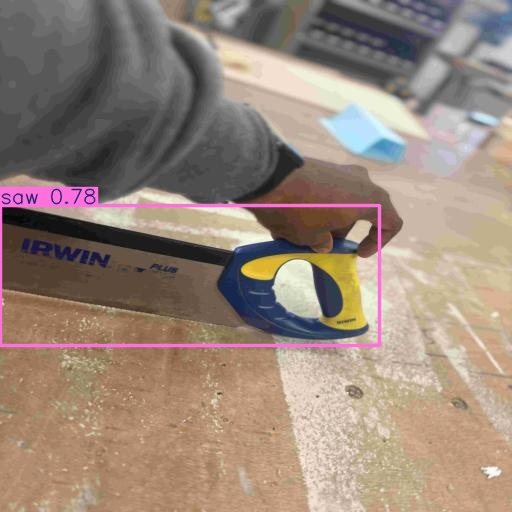

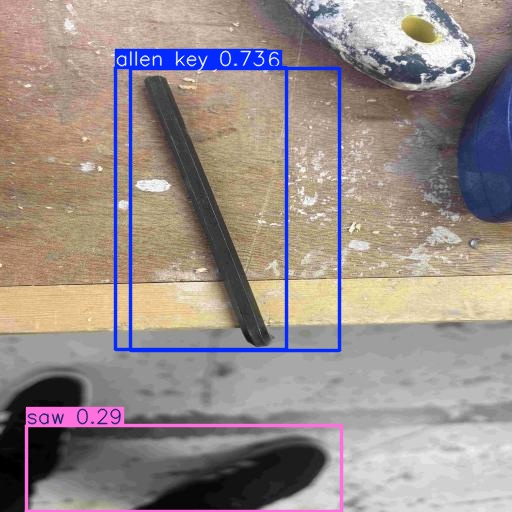

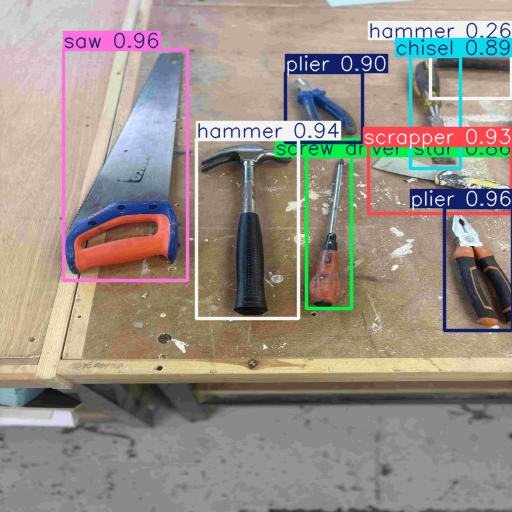

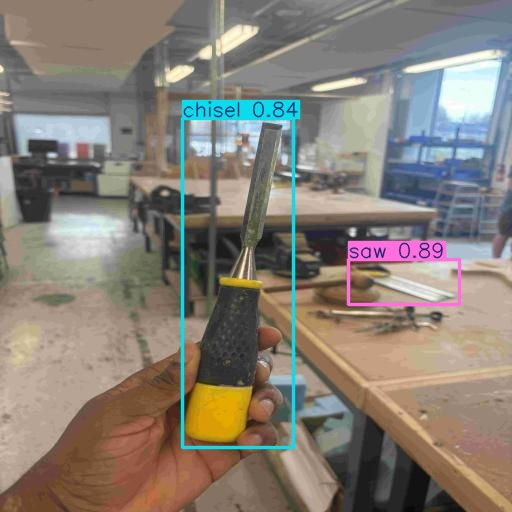

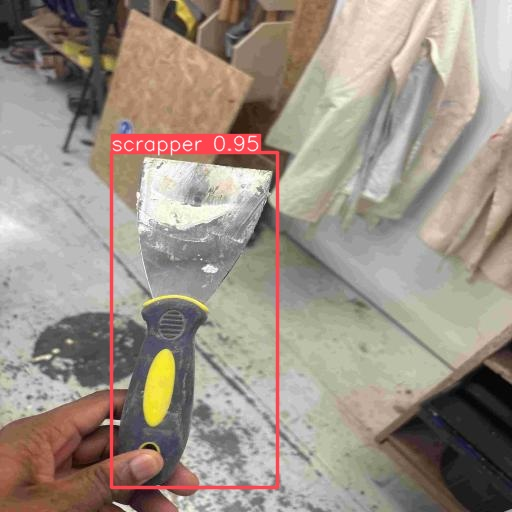

In [17]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:10]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Training YOLOv8 with Augmented Dataset

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset_aug_v8.location}/data.yaml epochs=100 imgsz=512 plots=True name="YOLOv8_with_aug"

/content
New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Hand-Tool-Detection-6/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

/content/augumentation


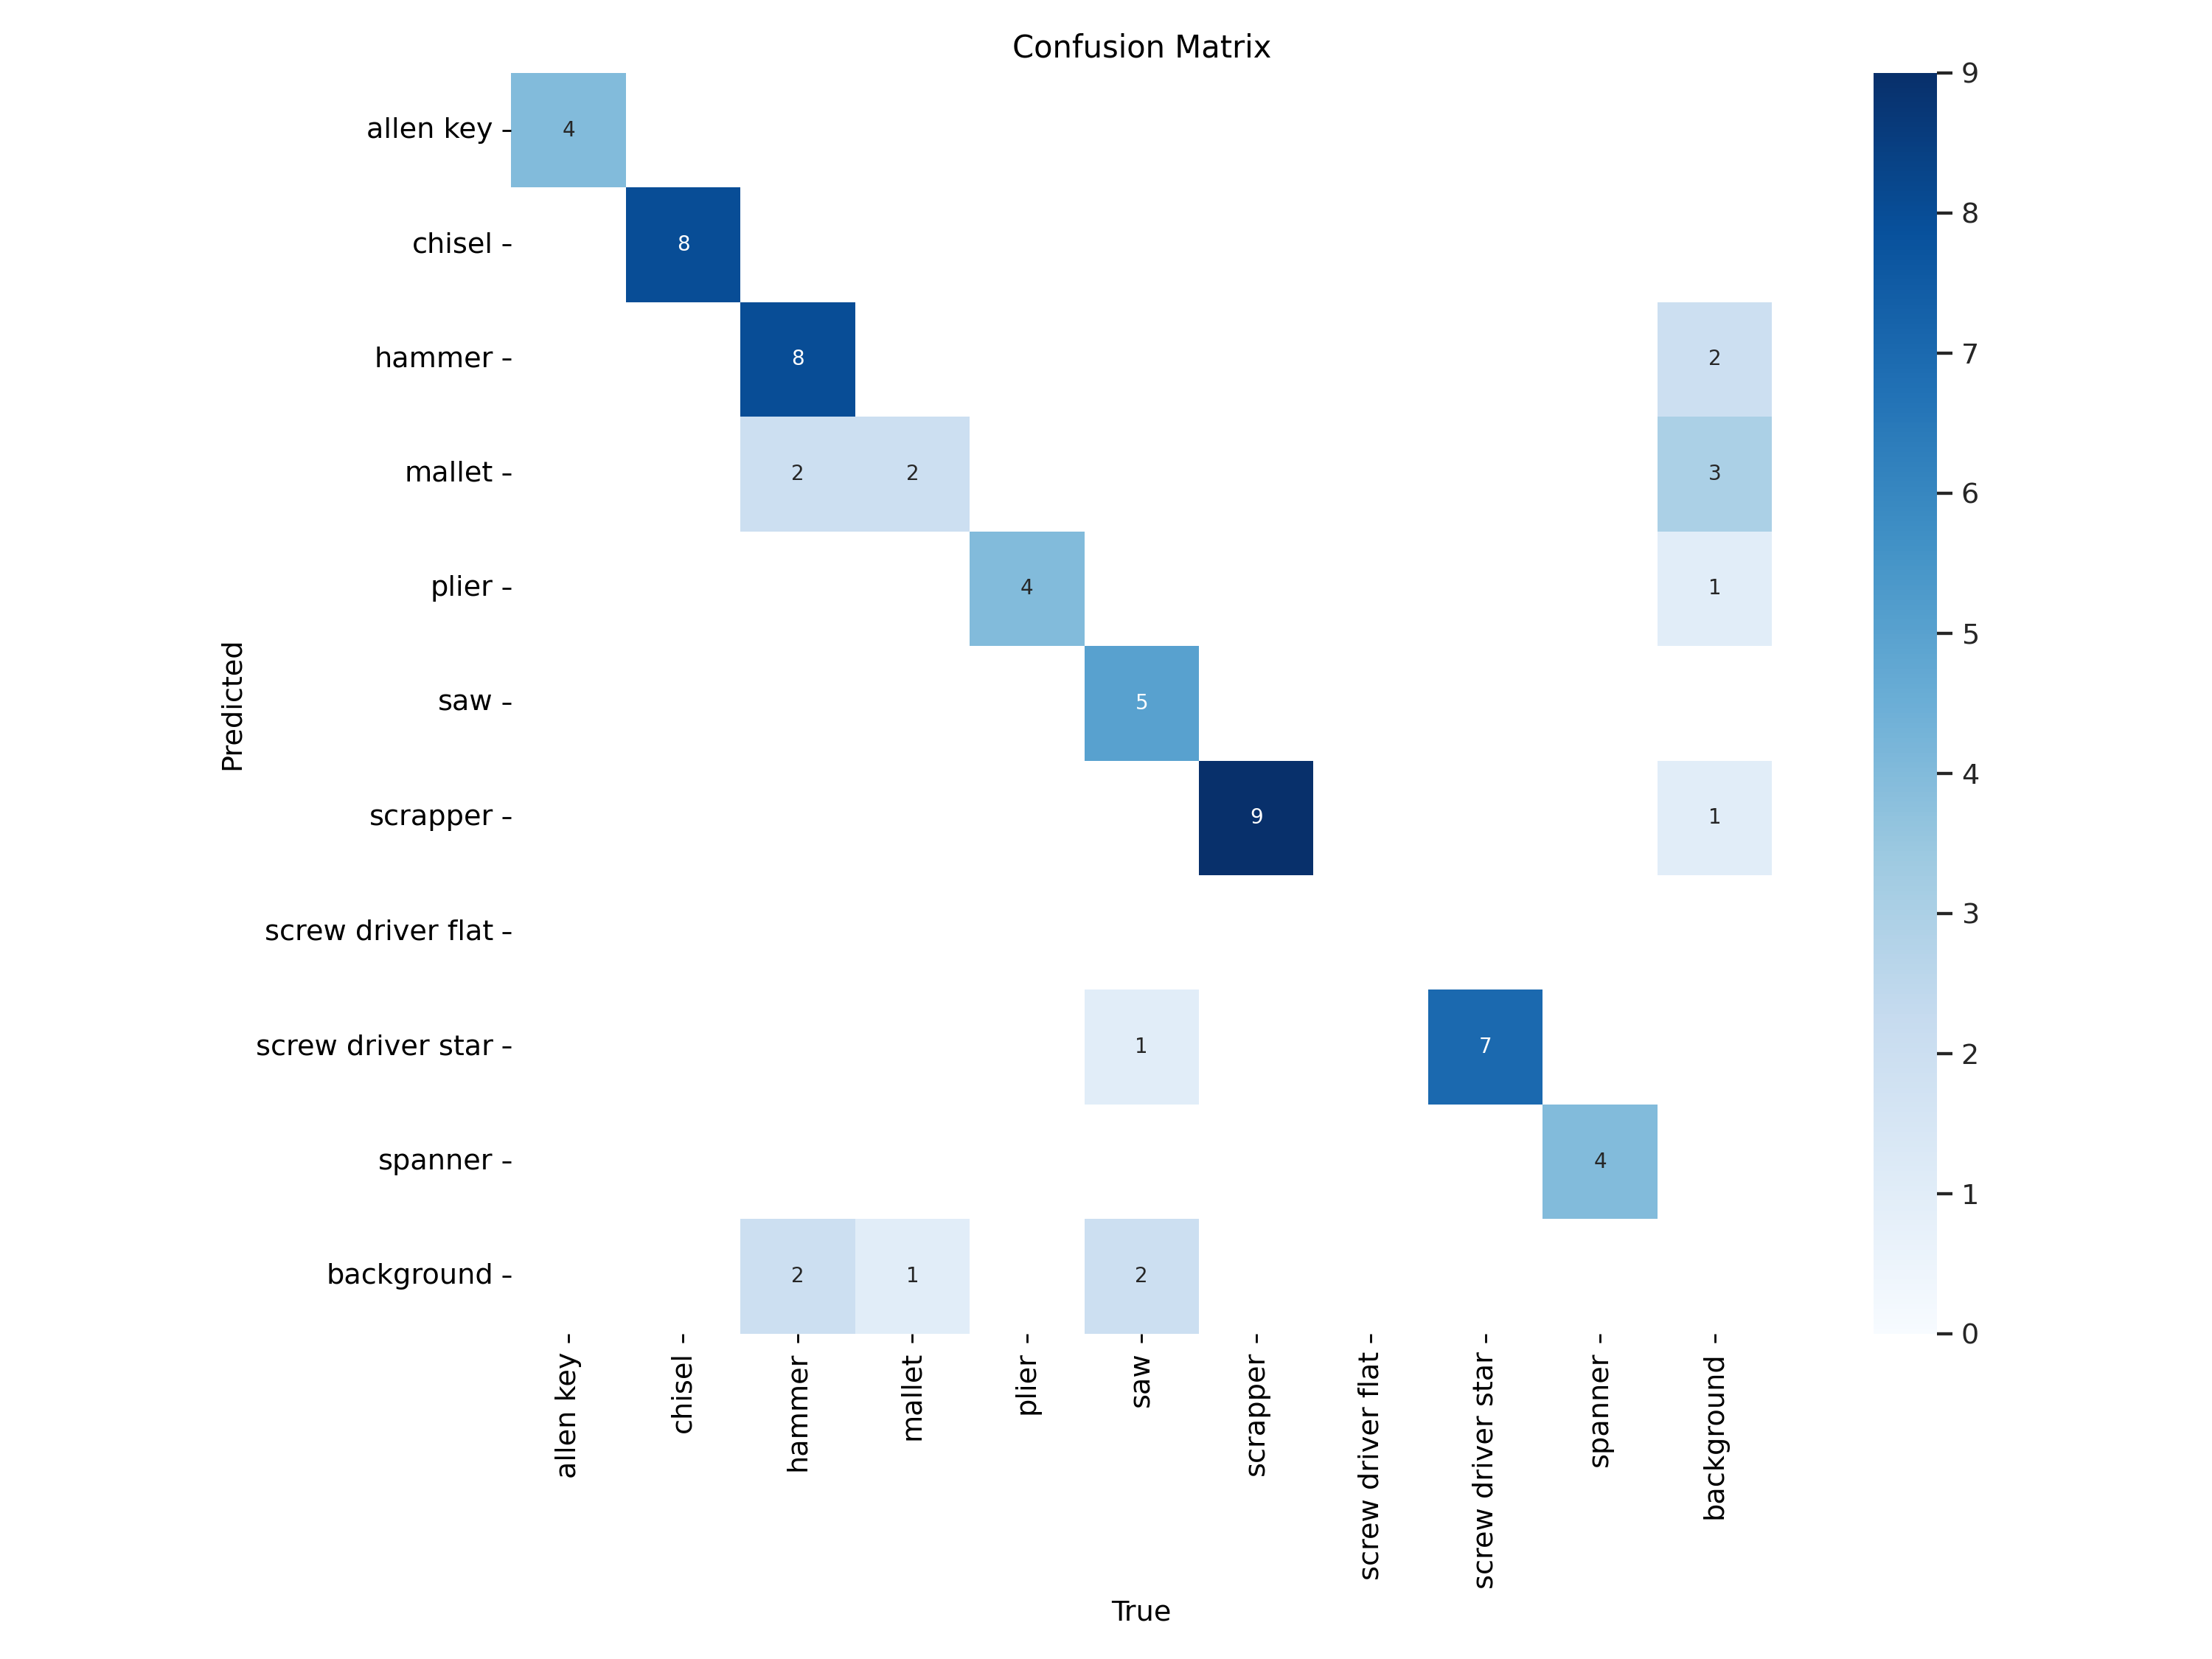

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/YOLOv8_with_aug/confusion_matrix.png', width=1000)

/content/augumentation


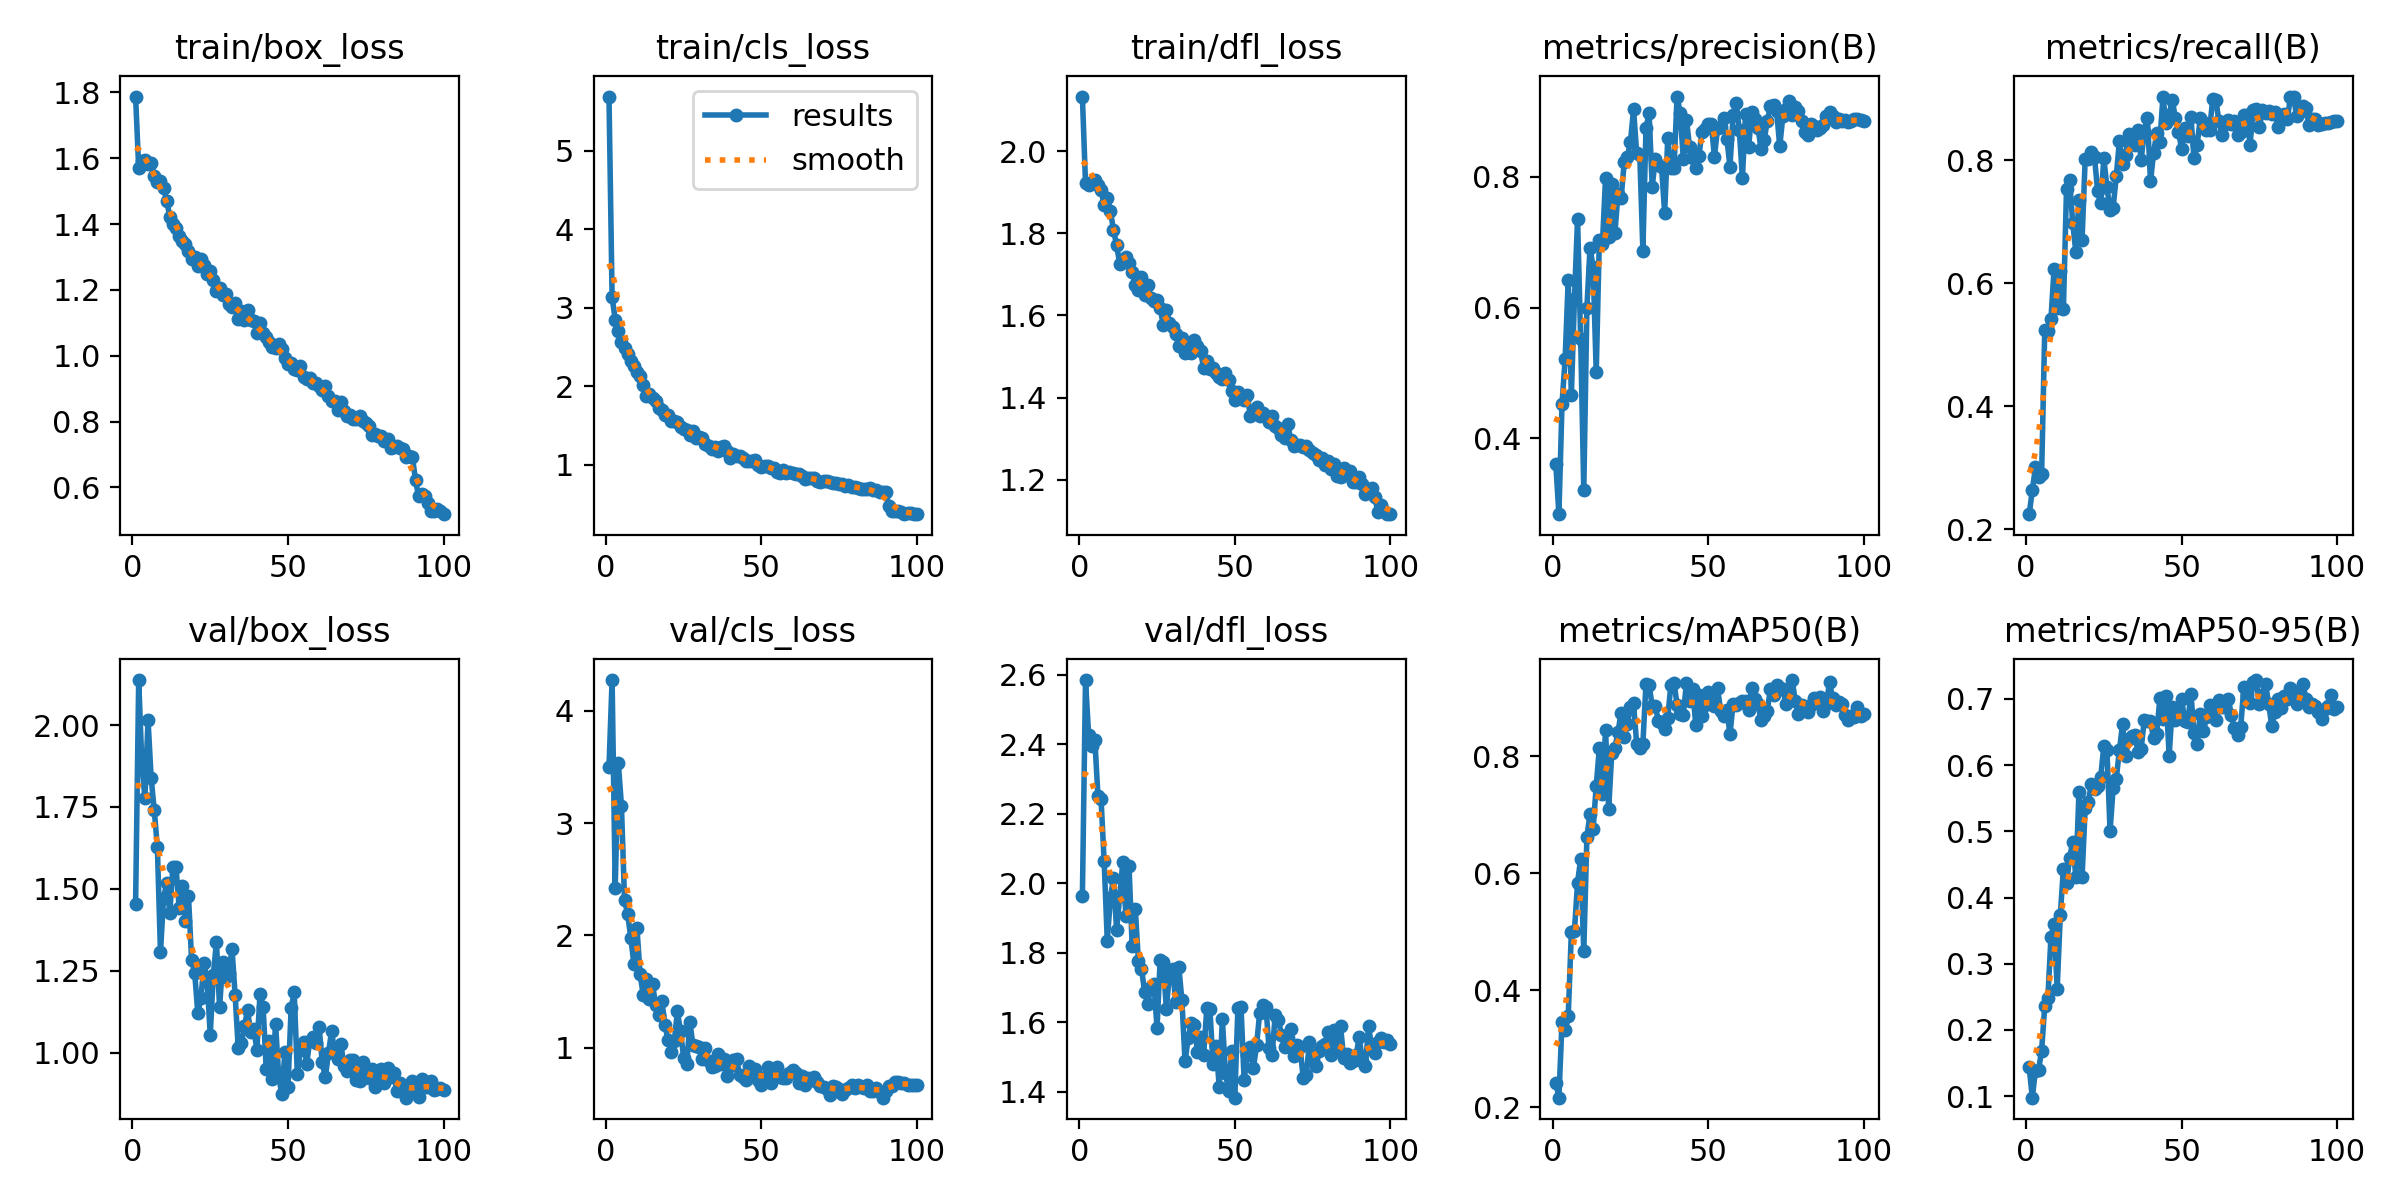

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/YOLOv8_with_aug/results.png', width=1000)

/content/augumentation


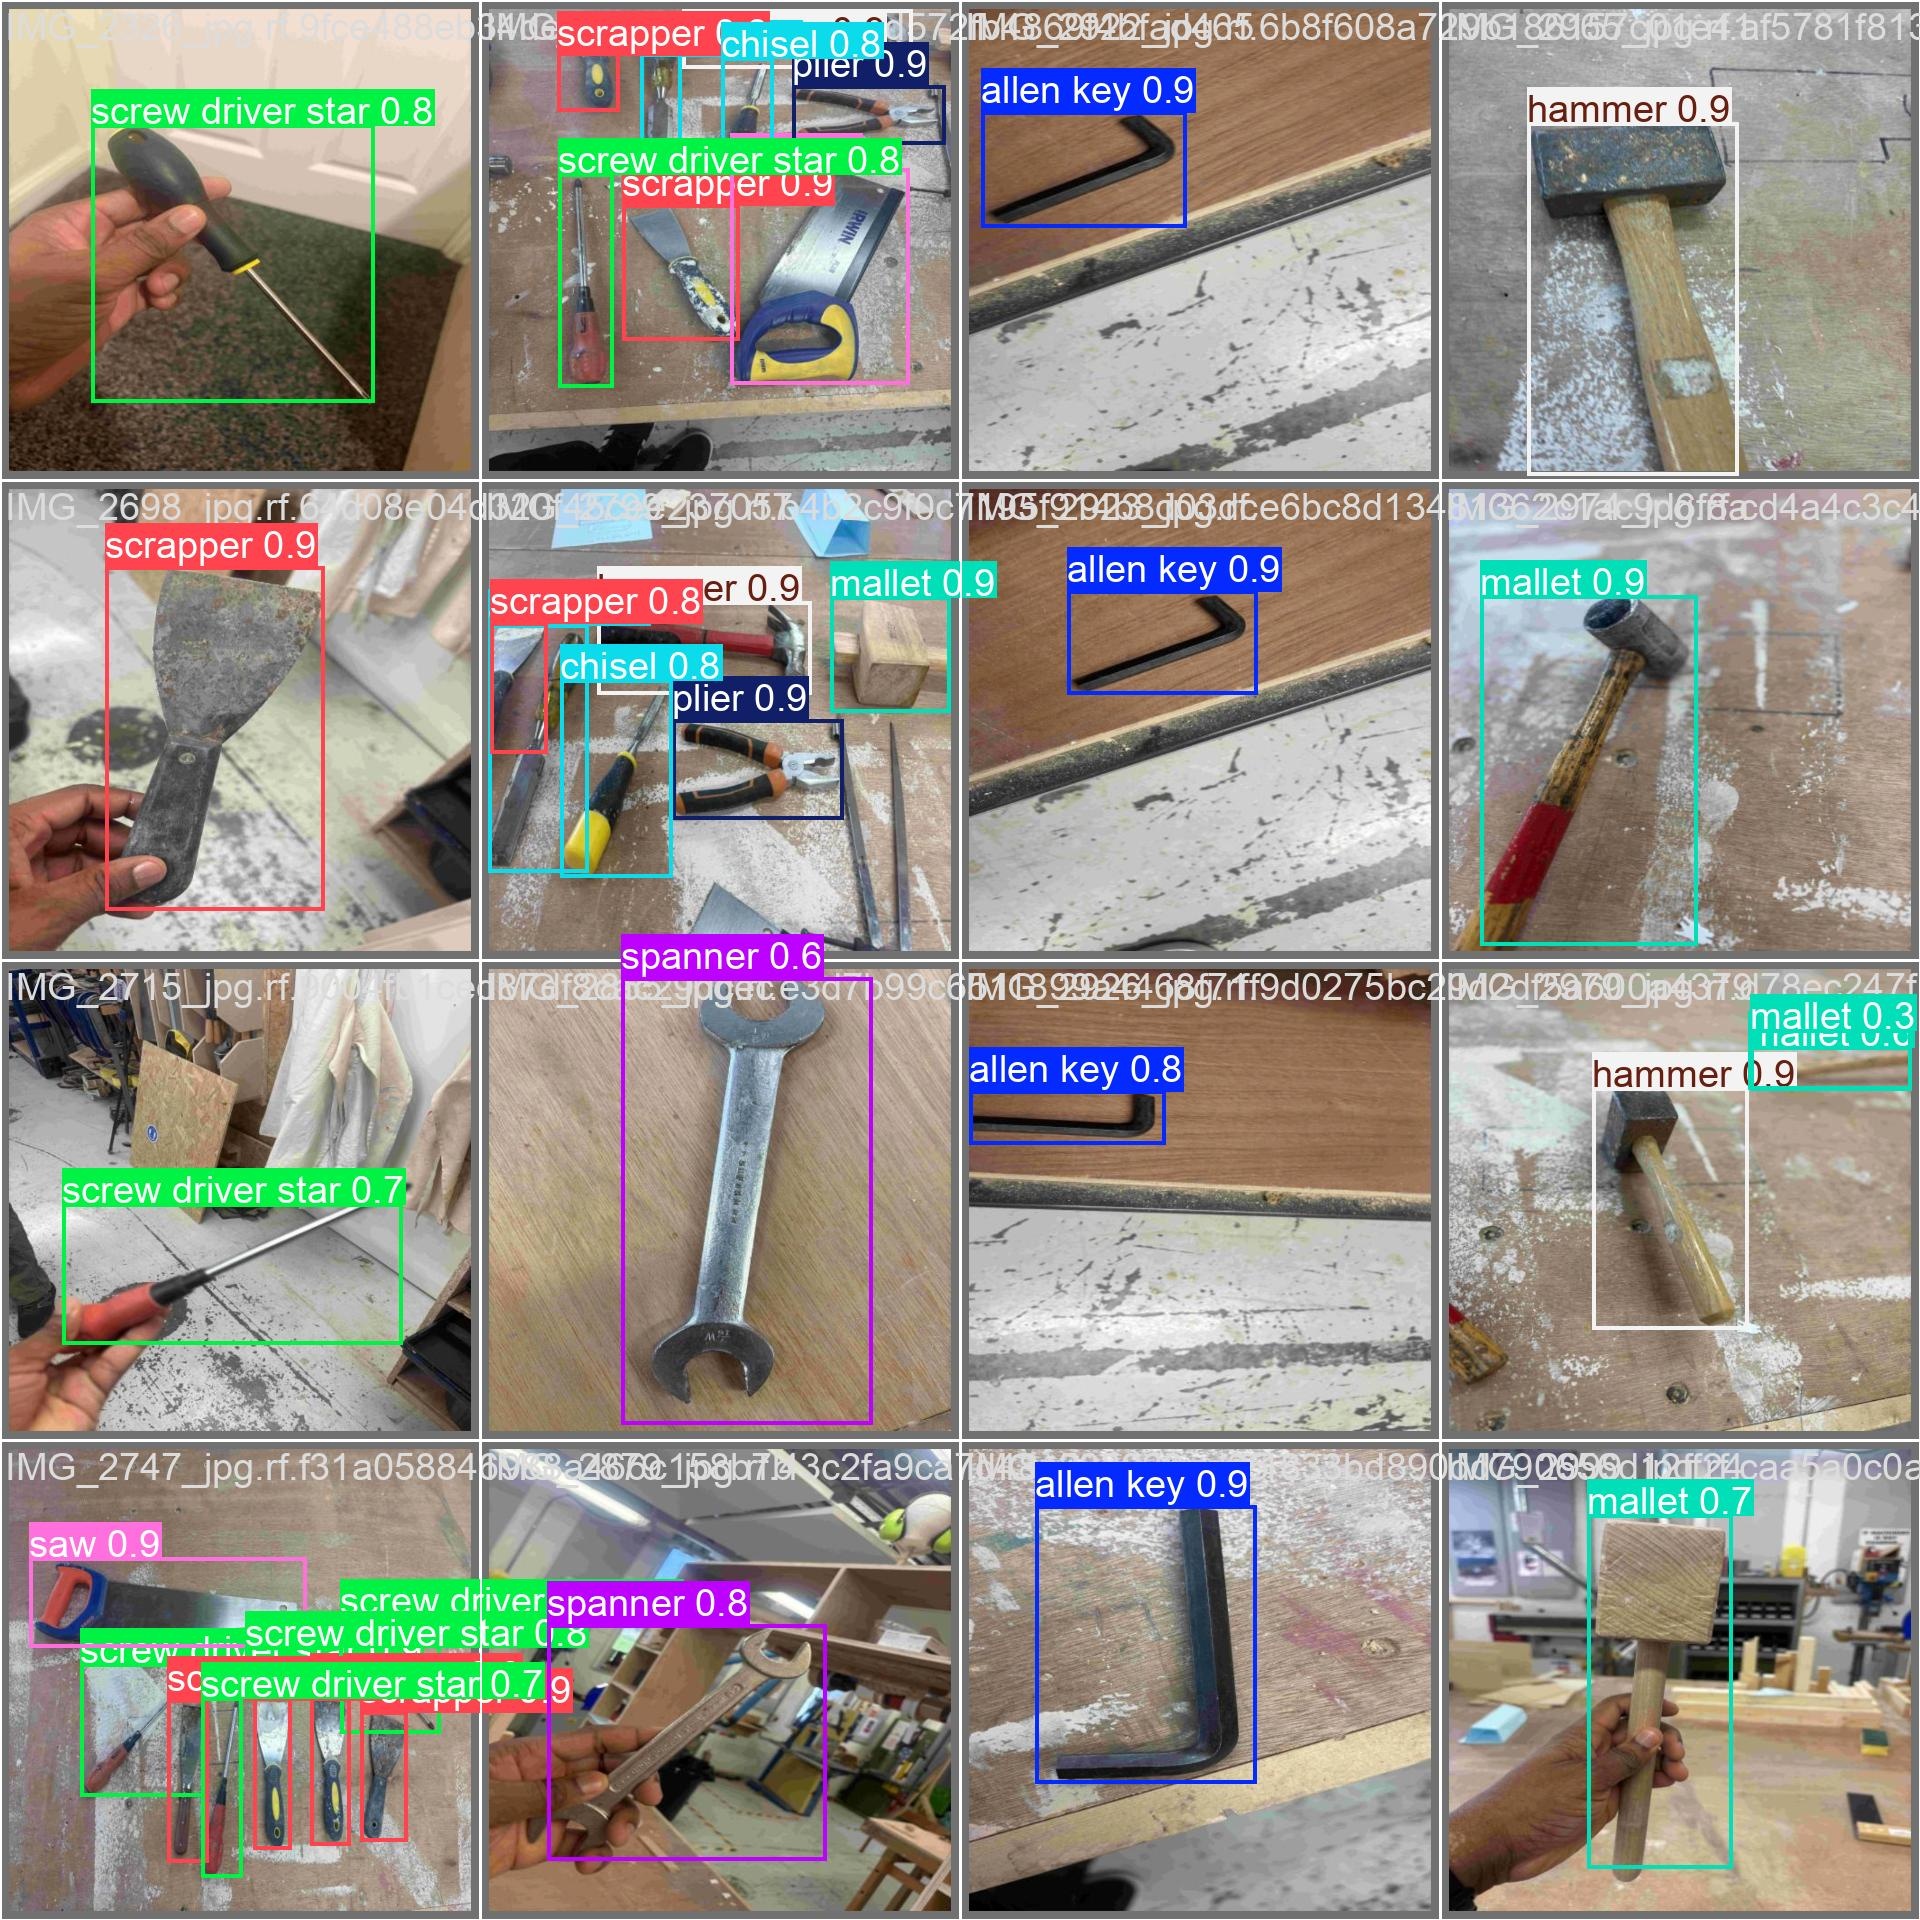

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/YOLOv8_with_aug/val_batch0_pred.jpg', width=1000)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/YOLOv8_with_aug/weights/best.pt data={dataset.location}/data.yaml

/content/augumentation
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Hand-Tool-Detection-5/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.33it/s]
                   all         38         59      0.893      0.883      0.914      0.726
             allen key          4          4      0.953          1      0.995       0.85
                chisel          6          8      0.975          1      0.995      0.753
                hammer         11         12          1      0.716      0.839      0.696
                mallet          3          3      0.465      0.667       0.51      0.408
                 plier          4          4      0.908          1      0.995      0.839
       

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/YOLOv8_with_aug/weights/best.pt conf=0.25 source={dataset_aug_v8.location}/test/images save=True

/content/augumentation
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs

image 1/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2385_jpg.rf.6ef11b5af92f9946bc3ea109902311b9.jpg: 800x800 1 hammer, 1 saw, 22.3ms
image 2/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2386_jpg.rf.1439edfbf4836fd4f95d12dfd5083c83.jpg: 800x800 1 allen key, 1 screw driver flat, 22.4ms
image 3/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2389_jpg.rf.750a11e918c9dab3e1eb802a79961d48.jpg: 800x800 1 hammer, 22.4ms
image 4/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2393_jpg.rf.5ec86b912a3e7fc706465f54be3f05f8.jpg: 800x800 1 hammer, 23.7ms
image 5/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_2429_jpg.rf.12c7ffca297064877f35cba78eafe650.jpg: 800x800 1 saw, 22.3ms
image 6/38 /content/datasets/Hand-Tool-Detection-5/test/images/IMG_

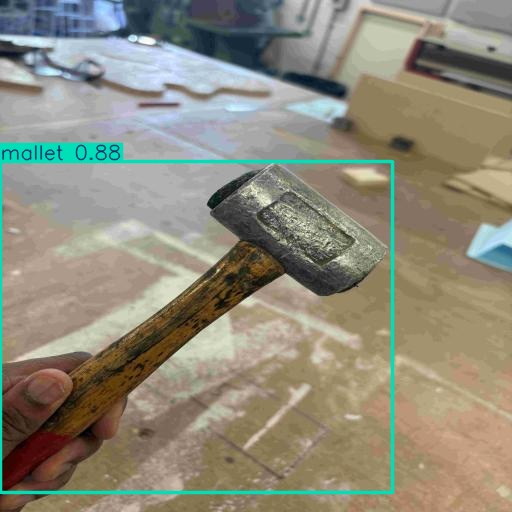

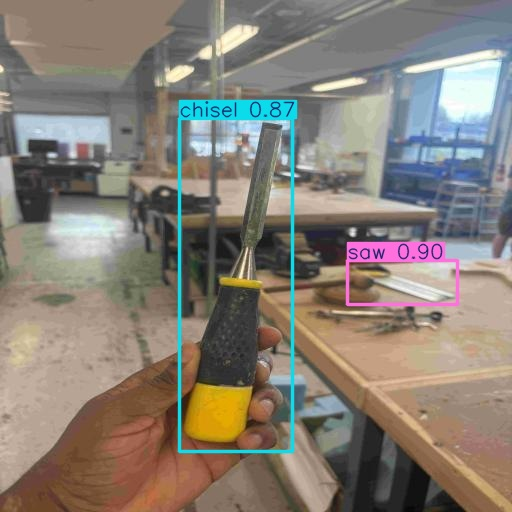

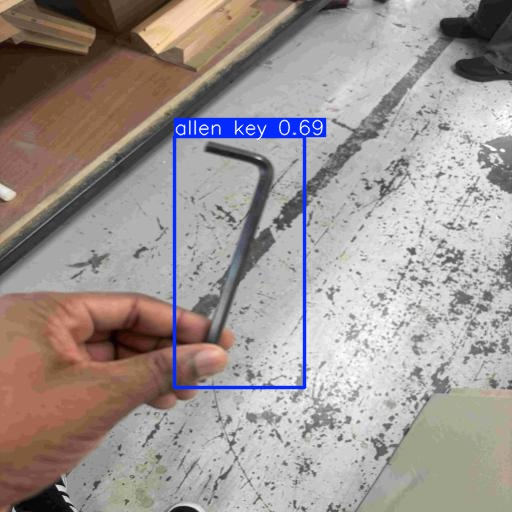

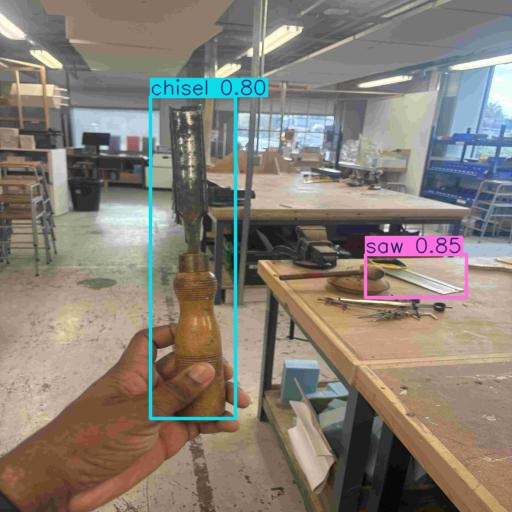

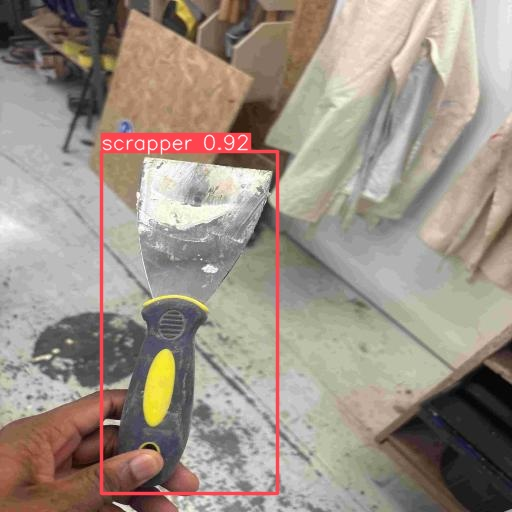

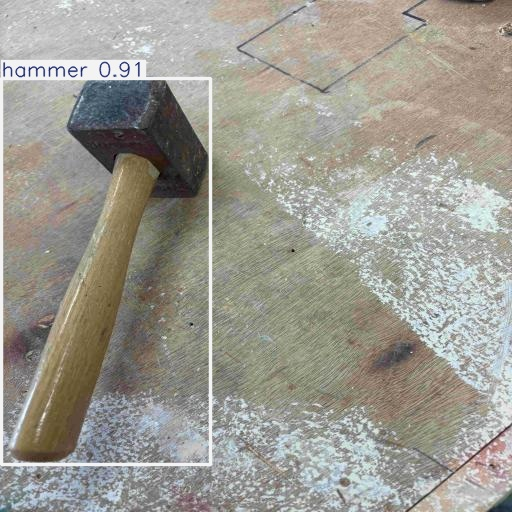

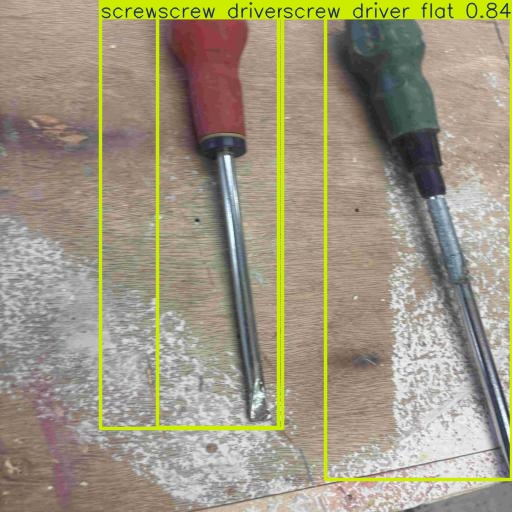

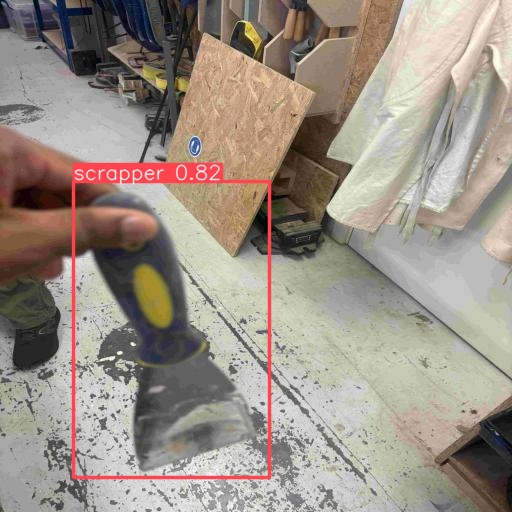

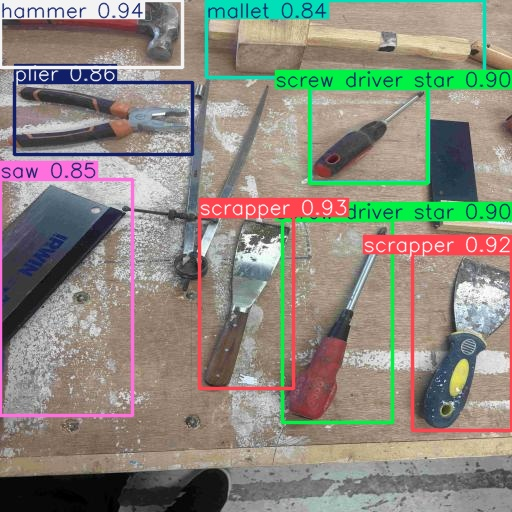

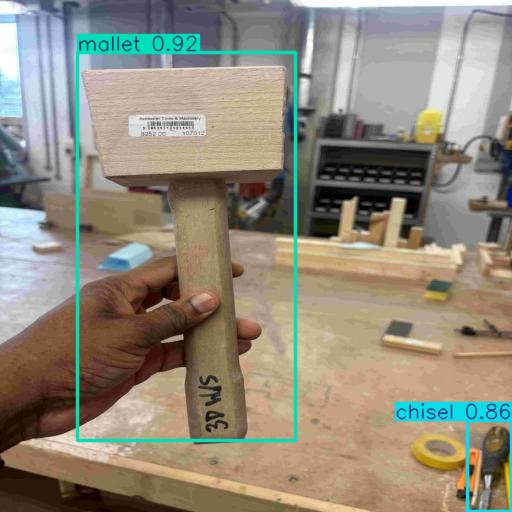

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/augumentation/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:10]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov9s.pt data={dataset_v9.location}/data.yaml epochs=100 imgsz=512 plots=True name="YOLOv9_no_aug"